In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#K MEANS
from sklearn.cluster import KMeans

#GMM
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()


In [5]:
cols=['UserID','MovieID','Rating','Timestamp']
ratings=pd.read_csv('data/ml-1m/ratings.dat',sep='::',engine='python',names=cols)

mov=['MovieID','Title','Genres']
movies=pd.read_csv('data/ml-1m/movies.dat',sep='::',engine='python',names=mov)

In [6]:
val=ratings['MovieID'].value_counts()
print(val)

2858    3428
260     2991
1196    2990
1210    2883
480     2672
        ... 
3323       1
624        1
763        1
2484       1
133        1
Name: MovieID, Length: 3706, dtype: int64


In [7]:
x=val[val<1000].index
#y=val[val>=1000].index
print(x)

Int64Index([1266,  551, 1909, 3897, 3363,  329, 3052, 1183, 2353,  539,
            ...
            3321, 2226, 3607, 1714, 1709, 3323,  624,  763, 2484,  133],
           dtype='int64', length=3499)


In [8]:
high_rat=ratings[~ratings['MovieID'].isin(x)].index #All the ratings which are having more than 1000 views
low_rat=ratings[ratings['MovieID'].isin(x)].index #All the ratings which are having less than 1000 views
long_tail=ratings.drop(index=high_rat)
short_tail=ratings.drop(index=low_rat)



In [9]:
print(long_tail)
print()
print(short_tail)

         UserID  MovieID  Rating  Timestamp
1             1      661       3  978302109
2             1      914       3  978301968
6             1     1287       5  978302039
8             1      594       4  978302268
11            1      938       4  978301752
...         ...      ...     ...        ...
1000199    6040     2022       5  956716207
1000201    6040     1080       4  957717322
1000204    6040     1091       1  956716541
1000206    6040      562       5  956704746
1000207    6040     1096       4  956715648

[694836 rows x 4 columns]

         UserID  MovieID  Rating  Timestamp
0             1     1193       5  978300760
3             1     3408       4  978300275
4             1     2355       5  978824291
5             1     1197       3  978302268
7             1     2804       5  978300719
...         ...      ...     ...        ...
1000200    6040     2028       5  956704519
1000202    6040     1089       4  956704996
1000203    6040     1090       3  956715518
1000

In [10]:
long_tail.groupby('MovieID').size().sort_values(ascending=False)[:10]

MovieID
1266    997
1909    996
551     996
3897    994
329     990
3363    990
3052    989
1183    989
2353    988
539     986
dtype: int64

In [11]:
short_tail.groupby('MovieID').size().sort_values(ascending=False)[:10]

MovieID
2858    3428
260     2991
1196    2990
1210    2883
480     2672
2028    2653
589     2649
2571    2590
1270    2583
593     2578
dtype: int64

Text(0.5, 1.0, 'Long Tail Values v/s Count i.e <1000 views')

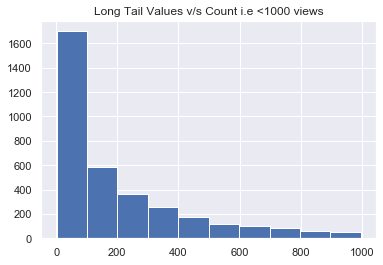

In [12]:
fig = plt.figure(figsize=(6,4))
ax  = fig.add_subplot(111)
ax.hist(long_tail['MovieID'].value_counts())
plt.title('Long Tail Values v/s Count i.e <1000 views')
#ax.hist(short_tail['MovieID'].value_counts(), bins=[3000,3500,4000,4500])

(array([89., 49., 27.,  9.,  8., 11., 10.,  1.,  2.,  1.]),
 array([1001. , 1243.7, 1486.4, 1729.1, 1971.8, 2214.5, 2457.2, 2699.9,
        2942.6, 3185.3, 3428. ]),
 <a list of 10 Patch objects>)

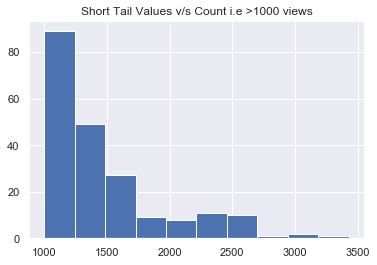

In [13]:
fig = plt.figure(figsize=(6,4))
ax  = fig.add_subplot(111)
plt.title('Short Tail Values v/s Count i.e >1000 views')
ax.hist(short_tail['MovieID'].value_counts())

In [14]:

df = pd.merge(long_tail, movies, on='MovieID')
print(df.shape)

df_short=pd.merge(short_tail,movies,on='MovieID')
print(df_short.shape)

(694836, 6)
(305373, 6)


In [15]:
df.drop(['Timestamp','Genres','Title'],axis=1,inplace=True)
df['Rating'].replace(np.nan,0,inplace=True)
df['Rating'].replace([1,2,3,4,5],1,inplace=True)

df.head()


,UserID,MovieID,Rating
0,1,661,1
1,23,661,1
2,49,661,1
3,53,661,1
4,57,661,1


In [16]:

df_short.drop(['Timestamp','Genres','Title'],axis=1,inplace=True)
df_short['Rating'].replace(np.nan,0,inplace=True)
df_short['Rating'].replace([1,2,3,4,5],1,inplace=True)
df_short.head()

,UserID,MovieID,Rating
0,1,1193,1
1,2,1193,1
2,12,1193,1
3,15,1193,1
4,17,1193,1


In [17]:
df.groupby('MovieID').size().sort_values(ascending=False)[:10]

MovieID
1266    997
1909    996
551     996
3897    994
329     990
3363    990
3052    989
1183    989
2353    988
539     986
dtype: int64

In [14]:
pivot_item_based = pd.pivot_table(df,index='MovieID',columns=['UserID'], values='Rating',fill_value=0)  
pivot_item_based

UserID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,6001,6002,6003,6004,6005,6006,6007,6008,6009,6010,6011,6012,6013,6014,6015,6016,6017,6018,6019,6020,6021,6022,6023,6024,6025,6026,6027,6028,6029,6030,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
MovieID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3950,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
pivot_item_based.shape

(3499, 6040)

In [83]:
pivot_short = pd.pivot_table(df_short,index='MovieID',columns=['UserID'], values='Rating',fill_value=0)  
pivot_short

UserID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,6001,6002,6003,6004,6005,6006,6007,6008,6009,6010,6011,6012,6013,6014,6015,6016,6017,6018,6019,6020,6021,6022,6023,6024,6025,6026,6027,6028,6029,6030,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
MovieID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
21,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
32,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,1,0,0,1
34,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3703,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3751,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3753,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [84]:
pivot_short.shape

(207, 6039)

In [ ]:
kmeans = KMeans(50)
kfit = kmeans.fit(pivot_item_based)
identified_clusters = kfit.predict(pivot_item_based)

In [18]:
clustered_data = pivot_item_based.copy()
clustered_data['Cluster'] = identified_clusters

In [ ]:
display(clustered_data.sort_values(by='Cluster'))

In [16]:
# use library to confirm results
gmm = GaussianMixture(n_components = 10,max_iter = 5, random_state = 3)
#Tried values are: 15 50, 20 50, 50 50, 100 600,20 5, 10 5.. none working.. Memory error
#gmm = GaussianMixture(n_components = 50, covariance_type = 'full',max_iter = 600, random_state = 3)

In [17]:
gmm.fit(pivot_item_based)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=5,
                means_init=None, n_components=10, n_init=1,
                precisions_init=None, random_state=3, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [18]:
print(gmm.covariances_,gmm.means_,gmm.weights_)

[[[ 1.98603864e-02  1.82158510e-02 -1.36961286e-04 ... -1.36961286e-04
   -5.47845142e-04  7.62417823e-03]
  [ 1.82158510e-02  9.10802549e-02 -6.84806428e-04 ... -6.84806428e-04
    4.01753104e-03  1.78506209e-02]
  [-1.36961286e-04 -6.84806428e-04  6.71210299e-03 ... -4.56537619e-05
   -1.82615047e-04 -1.96311176e-03]
  ...
  [-1.36961286e-04 -6.84806428e-04 -4.56537619e-05 ...  6.71210299e-03
   -1.82615047e-04 -1.96311176e-03]
  [-5.47845142e-04  4.01753104e-03 -1.82615047e-04 ... -1.82615047e-04
    2.62975668e-02  5.66106647e-03]
  [ 7.62417823e-03  1.78506209e-02 -1.96311176e-03 ... -1.96311176e-03
    5.66106647e-03  2.06127735e-01]]

 [[ 1.42837137e-02  2.25792901e-03 -1.05019954e-04 ... -2.62549884e-04
    4.35832808e-03 -4.30581811e-03]
  [ 2.25792901e-03  8.53297125e-02 -6.82629700e-04 ... -1.70657425e-03
   -7.90275152e-03  2.63600084e-02]
  [-1.05019954e-04 -6.82629700e-04  7.19486683e-03 ... -1.31274942e-04
   -1.44402436e-03  1.47027935e-03]
  ...
  [-2.62549884e-04 -1.7

In [23]:
arr=gmm.covariances_
arr.reshape((arr.shape[0], -1))

array([[ 1.98603864e-02,  1.82158510e-02, -1.36961286e-04, ...,
        -1.96311176e-03,  5.66106647e-03,  2.06127735e-01],
       [ 1.42837137e-02,  2.25792901e-03, -1.05019954e-04, ...,
         5.48729259e-03, -8.48036127e-03,  2.08833178e-01],
       [ 1.00000000e-06,  0.00000000e+00,  0.00000000e+00, ...,
         5.39401079e-03,  1.67400335e-03,  1.32681265e-01],
       ...,
       [ 1.00000000e-06,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  3.39724342e-02],
       [ 1.00000000e-06,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  2.62975668e-02],
       [ 1.19040338e-02, -4.35476847e-04, -1.45158949e-04, ...,
         0.00000000e+00, -2.17738424e-03,  1.48063128e-01]])

converged or not:  True


TypeError: ignored

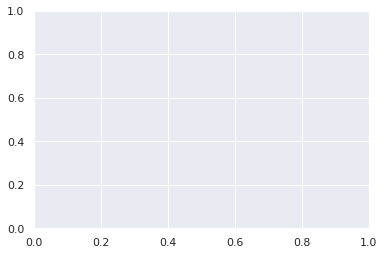

In [24]:
print('converged or not: ', gmm.converged_)
plt.contour(pivot_item_based, gmm.means_, arr, 'Final clusters')

In [25]:
labels = gmm.predict(pivot_item_based)
labels

array([5, 2, 6, ..., 4, 4, 6])

In [26]:
prob=gmm.predict_proba(pivot_item_based)
print(prob[:2])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [27]:
prob

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
gmm_cluster = pivot_item_based.copy()
gmm_cluster['Cluster'] = labels

In [41]:
display(gmm_cluster.sort_values(by='Cluster'))

UserID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,6002,6003,6004,6005,6006,6007,6008,6009,6010,6011,6012,6013,6014,6015,6016,6017,6018,6019,6020,6021,6022,6023,6024,6025,6026,6027,6028,6029,6030,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040,Cluster
MovieID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
562,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
1183,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,...,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0
431,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1186,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1188,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,9
3479,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,9
1373,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,9


In [42]:
gmm_cluster['Cluster'].value_counts(ascending=True)

3       3
8      37
5      74
9      83
2     127
7     142
0     148
1     276
6     710
4    1899
Name: Cluster, dtype: int64

In [ ]:
X=pivot_item_based

In [ ]:
n_components = np.arange(1, 100)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_components]
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [65]:
gmm_cluster[gmm_cluster['Cluster']==8]


UserID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,6002,6003,6004,6005,6006,6007,6008,6009,6010,6011,6012,6013,6014,6015,6016,6017,6018,6019,6020,6021,6022,6023,6024,6025,6026,6027,6028,6029,6030,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040,Cluster
MovieID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,8
10,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8
70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
95,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
153,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,8
163,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
165,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,8
208,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [63]:
gmm_cluster.loc[2243,'Cluster']

3

In [45]:
from scipy import sparse
sparse_pivot = sparse.csr_matrix(pivot_item_based.fillna(0))
print(sparse_pivot)

  (0, 9)	1
  (0, 12)	1
  (0, 17)	1
  (0, 22)	1
  (0, 26)	1
  (0, 39)	1
  (0, 43)	1
  (0, 47)	1
  (0, 52)	1
  (0, 59)	1
  (0, 61)	1
  (0, 74)	1
  (0, 82)	1
  (0, 91)	1
  (0, 108)	1
  (0, 113)	1
  (0, 118)	1
  (0, 126)	1
  (0, 135)	1
  (0, 145)	1
  (0, 146)	1
  (0, 147)	1
  (0, 148)	1
  (0, 156)	1
  (0, 162)	1
  :	:
  (3498, 4789)	1
  (3498, 4801)	1
  (3498, 4815)	1
  (3498, 4822)	1
  (3498, 4830)	1
  (3498, 4833)	1
  (3498, 4857)	1
  (3498, 4938)	1
  (3498, 5048)	1
  (3498, 5073)	1
  (3498, 5086)	1
  (3498, 5099)	1
  (3498, 5204)	1
  (3498, 5303)	1
  (3498, 5332)	1
  (3498, 5358)	1
  (3498, 5404)	1
  (3498, 5474)	1
  (3498, 5601)	1
  (3498, 5681)	1
  (3498, 5811)	1
  (3498, 5830)	1
  (3498, 5836)	1
  (3498, 5926)	1
  (3498, 5997)	1


In [87]:
from sklearn.metrics import pairwise as pw 
from scipy import sparse

def long_tail(MovieID,N=10):
  #print('The movie you selected is : ',+ movies[movies['MovieID']==MovieID]['Title'])
  cluster=gmm_cluster.loc[MovieID,'Cluster']
  new_df=gmm_cluster[gmm_cluster['Cluster']==cluster]
  sparse_pivot = sparse.csr_matrix(new_df)
  recommender = pw.cosine_similarity(sparse_pivot)
  recommender_df = pd.DataFrame(recommender,columns=new_df.index,index=new_df.index)
  cosine_df = pd.DataFrame(recommender_df[MovieID].sort_values(ascending=False))
  cosine_df.reset_index(level=0, inplace=True)
  cosine_df.columns = ['MovieID','Cosine_Similarity']
  cos_sim = cosine_df
  z=cos_sim[1:N+1]
  print()
  return z

In [93]:
long_tail(2002)

,MovieID,Cosine_Similarity
1,1918,0.746803
2,165,0.599482
3,434,0.576983
4,1552,0.568733
5,95,0.563037
6,153,0.558935
7,3107,0.554025
8,368,0.553118
9,1479,0.537406
10,292,0.534435


In [91]:
def short_tail(MovieID,N=10):
  sparse_pivot = sparse.csr_matrix(pivot_short)
  recommender = pw.cosine_similarity(sparse_pivot)
  recommender_df = pd.DataFrame(recommender,columns=pivot_short.index,index=pivot_short.index)
  cosine_df = pd.DataFrame(recommender_df[MovieID].sort_values(ascending=False))
  cosine_df.reset_index(level=0, inplace=True)
  cosine_df.columns = ['MovieID','Cosine_Similarity']
  cos_sim = cosine_df
  k=cos_sim[1:N+1]
  print()
  return k


In [94]:
new=pd.merge(ratings,movies,on='MovieID')
print(new.shape)


(1000209, 6)


In [95]:

new.drop(['Timestamp','Genres','Title'],axis=1,inplace=True)
new['Rating'].replace(np.nan,0,inplace=True)
new['Rating'].replace([1,2,3,4,5],1,inplace=True)
new.head()

,UserID,MovieID,Rating
0,1,1193,1
1,2,1193,1
2,12,1193,1
3,15,1193,1
4,17,1193,1


In [96]:
new_pivot = pd.pivot_table(new,index='MovieID',columns=['UserID'], values='Rating',fill_value=0)  
new_pivot

UserID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,6001,6002,6003,6004,6005,6006,6007,6008,6009,6010,6011,6012,6013,6014,6015,6016,6017,6018,6019,6020,6021,6022,6023,6024,6025,6026,6027,6028,6029,6030,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
MovieID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3950,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [97]:
def total(MovieID,N=10):
  sparse_pivot = sparse.csr_matrix(new_pivot)
  recommender = pw.cosine_similarity(sparse_pivot)
  recommender_df = pd.DataFrame(recommender,columns=new_pivot.index,index=new_pivot.index)
  cosine_df = pd.DataFrame(recommender_df[MovieID].sort_values(ascending=False))
  cosine_df.reset_index(level=0, inplace=True)
  cosine_df.columns = ['MovieID','Cosine_Similarity']
  cos_sim = cosine_df
  k=cos_sim[1:N+1]
  print()
  return k

In [100]:
total(2002)

,MovieID,Cosine_Similarity
1,1918,0.724927
2,2001,0.619686
3,165,0.567973
4,1377,0.557560
5,1370,0.553412
6,736,0.545831
7,434,0.540624
8,2000,0.537511
9,1552,0.537324
10,380,0.533209


In [120]:
k2=long_tail(2002)
k2

,MovieID,Cosine_Similarity
1,1918,0.746803
2,165,0.599482
3,434,0.576983
4,1552,0.568733
5,95,0.563037
6,153,0.558935
7,3107,0.554025
8,368,0.553118
9,1479,0.537406
10,292,0.534435


In [121]:
k1=total(2002)
k1

,MovieID,Cosine_Similarity
1,1918,0.724927
2,2001,0.619686
3,165,0.567973
4,1377,0.557560
5,1370,0.553412
6,736,0.545831
7,434,0.540624
8,2000,0.537511
9,1552,0.537324
10,380,0.533209


In [129]:
b=pd.merge(k1,k2, how='outer')
b

,MovieID,Cosine_Similarity
0,1918,0.724927
1,2001,0.619686
2,165,0.567973
3,1377,0.557560
4,1370,0.553412
5,736,0.545831
6,434,0.540624
7,2000,0.537511
8,1552,0.537324
9,380,0.533209


In [154]:
c=b.copy()
c.drop_duplicates(subset='MovieID',keep='last').nlargest(10,'Cosine_Similarity')


,MovieID,Cosine_Similarity
10,1918,0.746803
1,2001,0.619686
11,165,0.599482
12,434,0.576983
13,1552,0.568733
14,95,0.563037
15,153,0.558935
3,1377,0.557560
16,3107,0.554025
4,1370,0.553412


In [156]:
def topN(MovieID,N=10):
  a=long_tail(MovieID)
  b=total(MovieID)
  ma=pd.merge(a,b, how='outer')
  z=ma.drop_duplicates(subset='MovieID',keep='last').nlargest(N,'Cosine_Similarity')
  return z


In [157]:
topN(2002)

,MovieID,Cosine_Similarity
10,1918,0.724927
11,2001,0.619686
12,165,0.567973
4,95,0.563037
5,153,0.558935
13,1377,0.557560
6,3107,0.554025
14,1370,0.553412
7,368,0.553118
15,736,0.545831
